# Regression

Dataset

In [ ]:
import pandas as pd

df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

Explore the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# correlations
corr = df.corr(numeric_only=True)
corr['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


Preprocess the data

In [ ]:
df = df.dropna()  # nulls

In [ ]:
# convert the column from categorical to numerical
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [ ]:
X = df.drop('median_house_value', axis=1) # predictions
y = df['median_house_value'] # objective

Train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build the model

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # salida para regresión
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile model

In [ ]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

Early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

Train the model

In [ ]:
model_regression = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 55600193536.0000 - mae: 205892.0000 - val_loss: 54376423424.0000 - val_mae: 203131.5000
Epoch 2/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 51969249280.0000 - mae: 198335.1406 - val_loss: 41828966400.0000 - val_mae: 174965.9219
Epoch 3/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 36936445952.0000 - mae: 162335.0469 - val_loss: 23099056128.0000 - val_mae: 121519.7344
Epoch 4/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 19077517312.0000 - mae: 107581.1406 - val_loss: 12878949376.0000 - val_mae: 85586.7109
Epoch 5/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10759340032.0000 - mae: 79079.9062 - val_loss: 10218184704.0000 - val_mae: 75737.5391
Epoch 6/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9290790912.0000 - mae: 72121.6953 - val_loss: 9169402880.0000 - val_mae: 70992.8438
Epoch 7/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8073186816.0000 - mae: 67075.1797 - val_loss: 845169

Evaluate the model

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"test loss: ", test_loss)
print(f"test mae: ", test_mae)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4172937728.0000 - mae: 46096.4922
test loss:  4294310400.0
test mae:  46529.12109375


Graphic

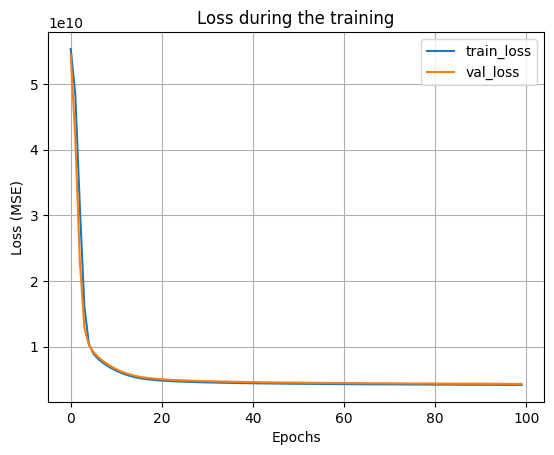

In [ ]:
plt.plot(model_regression.history["loss"], label="train_loss")
plt.plot(model_regression.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss during the training")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error en test: {mae}")

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4172937728.0000 - mae: 46096.4922
Mean Absolute Error en test: 46529.12109375


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


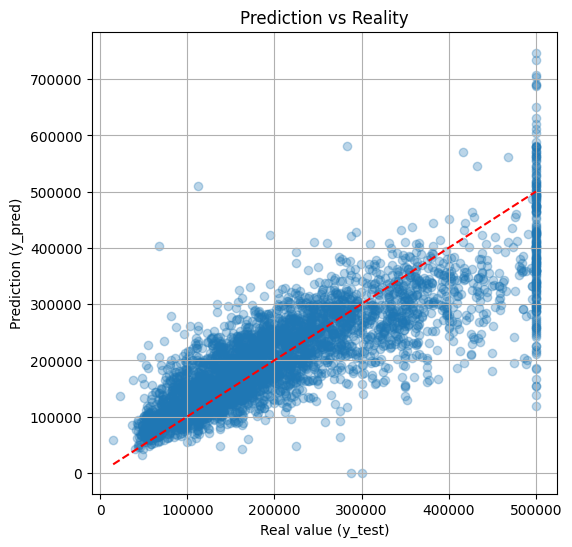

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test).flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel('Real value (y_test)')
plt.ylabel('Prediction (y_pred)')
plt.title('Prediction vs Reality')
plt.grid(True)
plt.show()

In [ ]:
model.save("regression_model.keras")

In [ ]:
from google.colab import files
files.download("regression_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>